<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_AI/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Mount Google Drive, load the dataframe from the file "content/drive/mydrive/ai4trade/trade_data_30_partners.parquet", and plot monthly exports and imports for both USA and China in two separate plots for the entire duration.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/ai4trade/trade_data_30_partners.parquet')

display(df.head())

## Filter data

### Subtask:
Filter the DataFrame to include only data for 'USA' and 'CHN' (China).


**Reasoning**:
Filter the DataFrame to include only rows where the 'origin' column is 'USA' or 'CHN' and overwrite the original DataFrame.



In [4]:
df = df[df['origin'].isin(['USA', 'CHN'])]
df.head()

,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,AGO,250610,2506,Imports,2023-01-01,94339
1,CHN,AGO,250620,2506,Imports,2023-01-01,356
2,CHN,AGO,251611,2516,Imports,2023-01-01,1117614
3,CHN,AGO,251612,2516,Imports,2023-01-01,2575491
4,CHN,AGO,270900,2709,Imports,2023-01-01,1539349098


## Convert 'month' column to datetime

### Subtask:
Ensure the 'month' column is in datetime format for proper time-series plotting.


**Reasoning**:
Convert the 'month' column to datetime format using pd.to_datetime().



In [5]:
df['month'] = pd.to_datetime(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16601270 entries, 0 to 16601269
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   origin       string        
 1   destination  string        
 2   hs6          string        
 3   hs4          string        
 4   trade_flow   string        
 5   month        datetime64[ns]
 6   value        int64         
dtypes: datetime64[ns](1), int64(1), string(5)
memory usage: 886.6 MB


## Aggregate data

### Subtask:
Group the data by month, origin, and trade flow, and sum the 'value' for each group.


**Reasoning**:
Group the data by month, origin, and trade flow, sum the 'value', and reset the index as requested in the instructions.



In [6]:
df_agg = df.groupby(['month', 'origin', 'trade_flow'])['value'].sum().reset_index()
display(df_agg.head())

,month,origin,trade_flow,value
0,2023-01-01,CHN,Exports,239500372537
1,2023-01-01,CHN,Imports,164236653834
2,2023-01-01,USA,Exports,144666835558
3,2023-01-01,USA,Imports,228866956842
4,2023-02-01,CHN,Exports,181153592637


## Separate data for plotting

### Subtask:
Create separate DataFrames or series for USA exports, USA imports, China exports, and China imports.


**Reasoning**:
Filter the aggregated DataFrame to create separate DataFrames for USA exports, USA imports, China exports, and China imports.



In [7]:
usa_exports = df_agg[(df_agg['origin'] == 'USA') & (df_agg['trade_flow'] == 'Exports')]
usa_imports = df_agg[(df_agg['origin'] == 'USA') & (df_agg['trade_flow'] == 'Imports')]
chn_exports = df_agg[(df_agg['origin'] == 'CHN') & (df_agg['trade_flow'] == 'Exports')]
chn_imports = df_agg[(df_agg['origin'] == 'CHN') & (df_agg['trade_flow'] == 'Imports')]

display(usa_exports.head())
display(usa_imports.head())
display(chn_exports.head())
display(chn_imports.head())

,month,origin,trade_flow,value
2,2023-01-01,USA,Exports,144666835558
6,2023-02-01,USA,Exports,140088472528
10,2023-03-01,USA,Exports,161416479194
14,2023-04-01,USA,Exports,142556815107
18,2023-05-01,USA,Exports,145873500166


,month,origin,trade_flow,value
3,2023-01-01,USA,Imports,228866956842
7,2023-02-01,USA,Imports,208034702493
11,2023-03-01,USA,Imports,236503691514
15,2023-04-01,USA,Imports,226576928468
19,2023-05-01,USA,Imports,239045017371


,month,origin,trade_flow,value
0,2023-01-01,CHN,Exports,239500372537
4,2023-02-01,CHN,Exports,181153592637
8,2023-03-01,CHN,Exports,261513653328
12,2023-04-01,CHN,Exports,241636194864
16,2023-05-01,CHN,Exports,230900628780


,month,origin,trade_flow,value
1,2023-01-01,CHN,Imports,164236653834
5,2023-02-01,CHN,Imports,167593505680
9,2023-03-01,CHN,Imports,192443160406
13,2023-04-01,CHN,Imports,173401562680
17,2023-05-01,CHN,Imports,185263132699


## Create plots

### Subtask:
Generate two plots: one for USA exports and imports, and one for China exports and imports.


**Reasoning**:
Generate two plots, one for USA trade flows and one for China trade flows, using the separated dataframes.



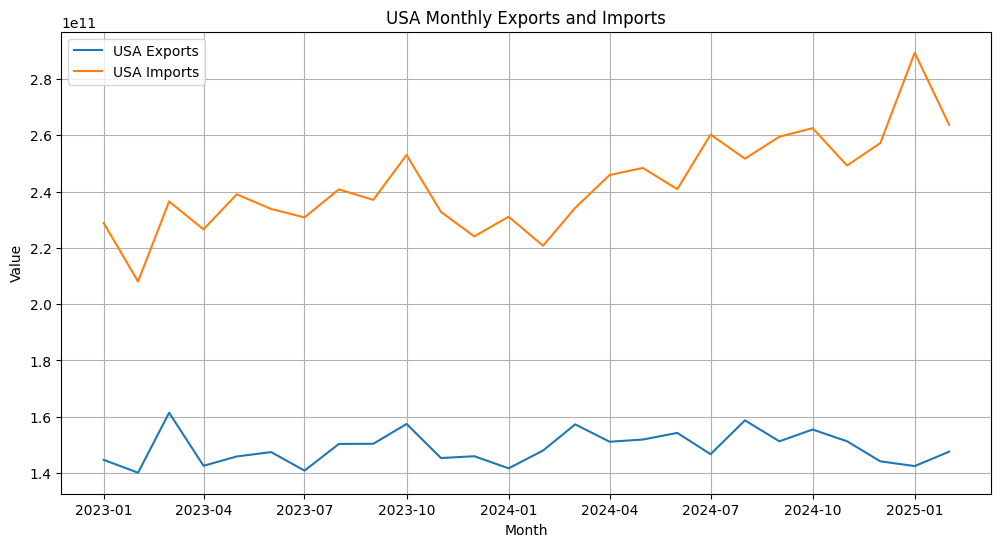

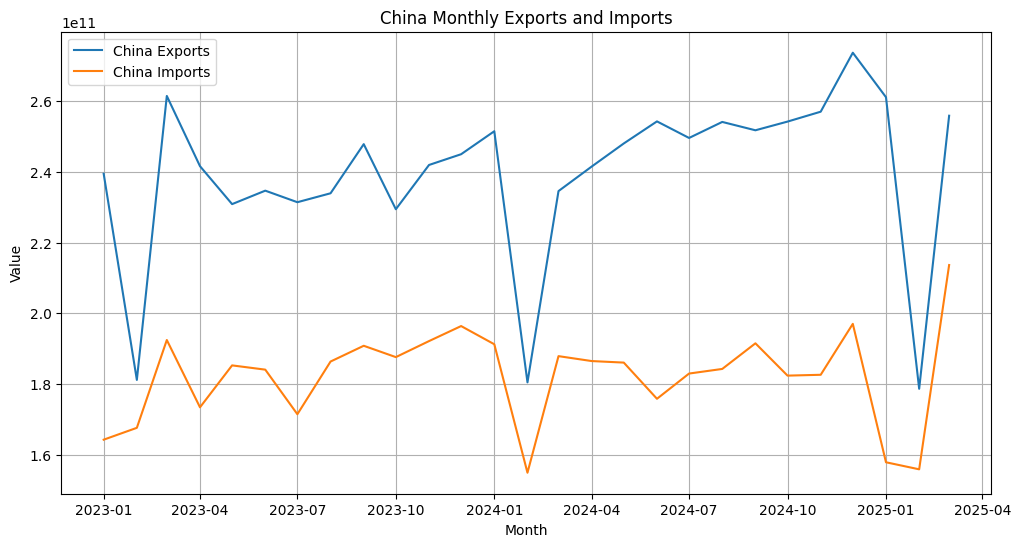

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(usa_exports['month'], usa_exports['value'], label='USA Exports')
plt.plot(usa_imports['month'], usa_imports['value'], label='USA Imports')
plt.title('USA Monthly Exports and Imports')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(chn_exports['month'], chn_exports['value'], label='China Exports')
plt.plot(chn_imports['month'], chn_imports['value'], label='China Imports')
plt.title('China Monthly Exports and Imports')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Improve plot readability

### Subtask:
Improve plot readability by adding titles, labels, and legends to the plots for clarity.


## Summary:

### Data Analysis Key Findings

* The data was successfully filtered to include only trade data for the USA and China.
* The 'month' column was successfully converted to a datetime format, enabling time-series analysis.
* The trade data was aggregated by month, origin, and trade flow, with the total value calculated for each group.
* Separate datasets were created for USA exports, USA imports, China exports, and China imports.
* Two distinct plots were generated, one showing the monthly export and import values for the USA and the other for China, over the entire duration of the dataset.
* The plots included titles, axis labels, legends, and grids for improved readability.

### Insights or Next Steps

* A visual comparison of the trade value scales between the USA and China plots could offer insights into the relative magnitude of their trade activities.
* Further analysis could involve calculating the trade balance (Exports - Imports) for each country over time and plotting this trend.
